In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(123)  # for reproducibility

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10

Using TensorFlow backend.


## Download dataset

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('')
print(X_train.shape)
print(y_train.shape)


(50000, 32, 32, 3)
(50000, 1)


## Preprocess data

In [4]:
# Feature processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Label processing
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

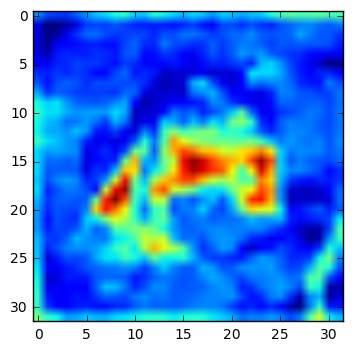

In [5]:
plt.imshow(X_train[0, :, :, 2])

In [6]:
model = Sequential()

# One convolutional to with 50 filters
# Input layer
model.add(Convolution2D(filters=50, kernel_size=(2, 2),
                        input_shape=X_train.shape[1:],
                        data_format='channels_last'))

# Another convolutional to 25x25 with 50 filters
model.add(Convolution2D(filters=50, kernel_size=(7, 7)))

# Another convolutional to 20x20 with 50 filters
model.add(Convolution2D(filters=50, kernel_size=(6, 6), activation='relu'))

# Now let's reduce
model.add(MaxPooling2D(pool_size=(2, 2)))

# And another convolution for funzies
model.add(Convolution2D(filters=30, kernel_size=(2, 2)))

# Dropout and densify
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(Y_train.shape[-1], activation='softmax'))

# Show summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 31, 50)        650       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 50)        122550    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 50)        90050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 50)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 30)          6030      
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2430)              0         
__________

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, Y_train, 
                    batch_size=32, epochs=1,
                    verbose=1)

Epoch 1/1
50000/50000 [==============================] - 1496s - loss: 1.5992 - acc: 0.4313  


In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [10]:
for i, metric in enumerate(model.metrics_names):
    print('{0}: {1:.03f}'.format(metric.upper(), score[i]))

LOSS: 1.380
ACC: 0.509
